<a href="https://colab.research.google.com/github/jeanpaulnazon/jeanpaulnazon.github.io/blob/master/log_Reg_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", size=14)
%matplotlib inline
sns.set(style='white', color_codes=True)
sns.set(style="whitegrid", color_codes=True)

In [ ]:
import requests #importing data portu_banking_final.csv using the web link
url = 'https://raw.githubusercontent.com/Tech-i-s/techis-ds-wiki/master/Step%203-2%20Classification%20Algos/01_logistic-regression/Log_reg_project/portu_banking_final.csv?token=AR7HP3BRORBE5JZYFUPW5KDAMINUW'
res = requests.get(url, allow_redirects=True)
with open('portu_banking_final.csv','wb') as file:
    file.write(res.content)
Data = pd.read_csv('portu_banking_final.csv')

In [ ]:
Data = Data.dropna()
print(Data.shape) # the data received from the bank has 41188 rows and 21 features
print(list(Data.columns))
print(Data.head())
print(Data.describe())
print(Data.info())



(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']
  age          job  marital  ... euribor3m nr_employed  y
0  44  blue-collar  married  ...     4.963      5228.1  0
1  53   technician  married  ...     4.021      5195.8  0
2  28   management   single  ...     0.729      4991.6  1
3  39     services  married  ...     1.405      5099.1  0
4  55      retired  married  ...     0.869      5076.2  1

[5 rows x 21 columns]
           duration      campaign  ...   nr_employed             y
count  41188.000000  41188.000000  ...  41188.000000  41188.000000
mean     258.285010      2.567593  ...   5167.035911      0.112654
std      259.279249      2.770014  ...     72.251528      0.316173
min        0.000000      1.000000  ...   4963.600000      0.000000
25%      102.000000      1.000000  ..

In [ ]:
Data['education'].unique() # cleaning the data for noises

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'basic-6y',
       'basic-9y', 'basic-4y', 'illiterate'], dtype=object)

In [ ]:
#grouping to reduce noises
Data['education']=np.where(Data['education'] =='basic.9y', 'Basic', Data['education'])
Data['education']=np.where(Data['education'] =='basic.6y', 'Basic', Data['education'])
Data['education']=np.where(Data['education'] =='basic.4y', 'Basic', Data['education'])

In [ ]:
Data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'basic-6y', 'basic-9y', 'basic-4y',
       'illiterate'], dtype=object)

In [ ]:
Data['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '25', '57', '63', '58', '60', '64', '51', '23', '20', '74',
       '80', '61', '62', '75', '21', '82', '77', '70', '76', '73', '66',
       '22', '71', '19', '79', '88', '65', '67', '81', '18', '84', '69',
       '98', '85', '83', '78', '92', '86', '94', '17', '91', '89', '87',
       '95'], dtype=object)

In [ ]:
print(Data['y'].value_counts()) # the feature 'y' 1 = Yes and 0 = No

0    36548
1     4640
Name: y, dtype: int64


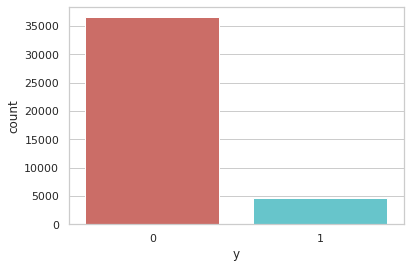

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot(x='y',data=Data,palette='hls') # the classes  are not balanced 
plt.show()
plt.savefig('count_plot')

In [ ]:
count_no_sub = len(Data[Data['y']==0])
count_sub = len(Data[Data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


In [ ]:
Data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.910638,220.844807,2.633085,985.345135,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [ ]:
Data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
ADMIN.,35.000000,637.000000,1.500000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.858500,5191.000000,0.000000
BLUE-COLLAR,47.000000,5.000000,7.000000,999.000000,1.000000,-1.800000,92.893000,-46.200000,1.281000,5099.100000,0.000000
HOUSEMAID,36.000000,84.000000,1.000000,999.000000,0.000000,-0.100000,93.200000,-42.000000,4.153000,5195.800000,0.000000
MANAGEMENT,36.000000,1225.000000,2.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.884000,5076.200000,0.000000
RETIRED,69.666667,545.000000,1.666667,668.000000,1.000000,-1.566667,93.142667,-37.233333,1.976667,5087.866667,0.333333
SERVICES,37.333333,238.333333,2.000000,999.000000,0.000000,1.200000,94.151000,-38.200000,4.892000,5203.366667,0.000000
STUDENT,24.500000,638.500000,1.500000,505.500000,0.500000,-1.750000,94.045500,-40.150000,0.752500,5000.150000,1.000000
TECHNICIAN,37.000000,834.000000,9.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.855000,5191.000000,0.000000
UNKNOWN,52.000000,54.000000,4.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.864000,5191.000000,0.000000


In [ ]:
Data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
D,39.000000,87.500000,1.250000,999.000000,0.000000,1.250000,93.974250,-37.675000,4.909750,5209.550000,0.000000
M,41.400000,418.400000,2.600000,999.000000,0.200000,-0.960000,92.931400,-37.560000,2.589200,5141.540000,0.000000
S,28.666667,283.333333,2.000000,999.000000,0.000000,-0.233333,93.396333,-34.733333,3.531333,5152.733333,0.000000
divorced,44.904080,253.934679,2.614583,968.613498,0.168837,0.163043,93.606244,-40.709701,3.714567,5170.845074,0.103299
married,42.306986,257.406332,2.572804,967.963528,0.155599,0.183854,93.597501,-40.271203,3.746064,5171.854853,0.101593
single,33.159101,261.518720,2.533939,952.231474,0.211414,-0.167972,93.517331,-40.920303,3.317391,5155.199905,0.140078
unknown,40.275000,312.725000,3.187500,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [ ]:
Data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.156828,263.161153,2.558670,976.345455,0.140969,0.191013,93.639686,-40.925871,3.729493,5172.016428,0.087145
basic-4y,48.916667,259.750000,4.250000,915.916667,0.250000,0.166667,93.747500,-42.225000,3.615083,5167.266667,0.083333
basic-6y,39.833333,222.500000,2.500000,999.000000,0.000000,0.766667,93.784667,-39.933333,4.313333,5194.233333,0.000000
basic-9y,44.400000,144.900000,1.600000,999.000000,0.200000,0.270000,93.732300,-42.120000,3.716900,5161.490000,0.000000
high.school,37.998003,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.079725,252.533855,2.586115,962.482548,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.877794,253.223373,2.563527,953.286982,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


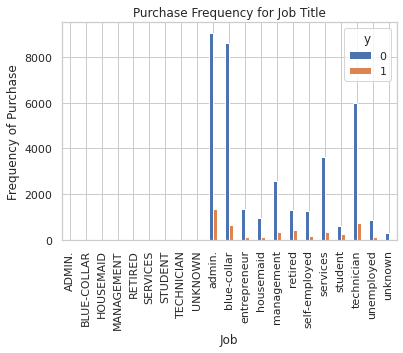

In [ ]:
%matplotlib inline
pd.crosstab(Data.job,Data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

the job title is important as you can see on the graph above the frequency of purchase depends on the job title

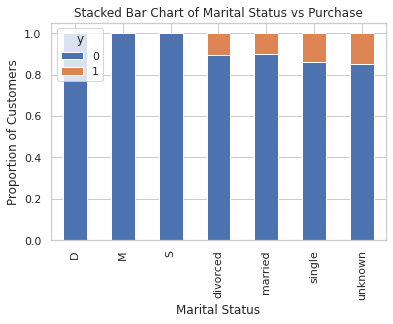

In [ ]:
table=pd.crosstab(Data.marital,Data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

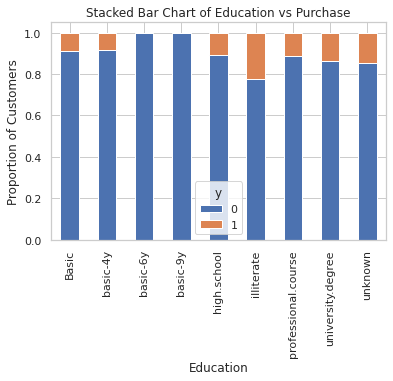

In [ ]:
table=pd.crosstab(Data.education,Data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

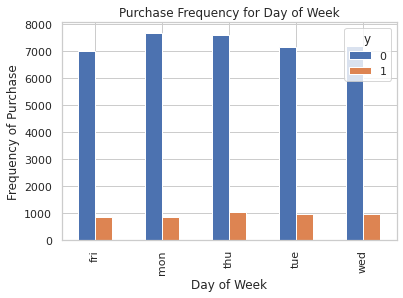

In [ ]:
pd.crosstab(Data.day_of_week,Data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

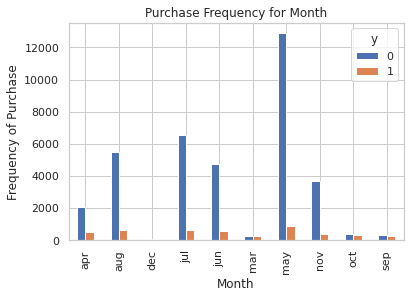

In [ ]:
pd.crosstab(Data.month,Data.y).plot(kind='bar')# can be useful to pradict outcome variable
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

In [ ]:
Data['age'].unique() # cleaning data manualy for non numerical values


array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '25', '57', '63', '58', '60', '64', '51', '23', '20', '74',
       '80', '61', '62', '75', '21', '82', '77', '70', '76', '73', '66',
       '22', '71', '19', '79', '88', '65', '67', '81', '18', '84', '69',
       '98', '85', '83', '78', '92', '86', '94', '17', '91', '89', '87',
       '95'], dtype=object)

In [ ]:
#grouping to reduce noises
Data['age']=np.where(Data['age'] =='18-25', '20', Data['age'])
Data['age']=np.where(Data['age'] =='35-30', '32', Data['age'])
Data['age']=np.where(Data['age'] =='30-32', '31', Data['age'])
Data['age']=np.where(Data['age'] =='50-55', '52', Data['age'])
Data['age']=np.where(Data['age'] =='45-50', '47', Data['age'])
Data['age']=np.where(Data['age'] =='20-25', '23', Data['age'])
Data['age']=np.where(Data['age'] =='35-40', '37', Data['age'])
Data['age']=np.where(Data['age'] =='20-40', '30', Data['age'])
Data['age']=np.where(Data['age'] =='30-35', '33', Data['age'])
Data['age']=np.where(Data['age'] =='25-30', '27', Data['age'])
Data['age']=np.where(Data['age'] =='30-40', '35', Data['age'])


In [ ]:
Data['age1'] = pd.to_numeric(Data['age'])

In [ ]:
Data['age1'].describe()

count    41188.000000
mean        40.023575
std         10.421444
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age1, dtype: float64

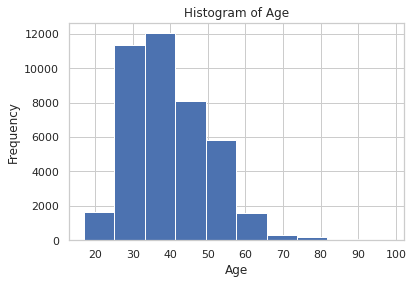

In [ ]:
# the majority of the population is between the age of 30-40
Data.age1.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')


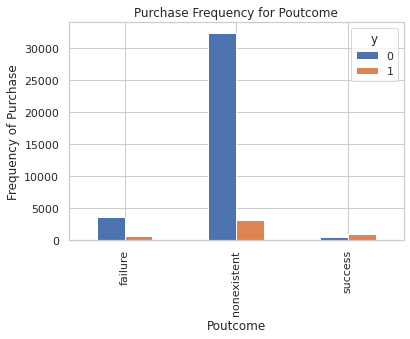

In [ ]:
pd.crosstab(Data.poutcome,Data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar') # strong relation with the outcome variable

Start creating Dummies

In [ ]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(Data[var], prefix=var)
    data1=Data.join(cat_list)
    Data=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=Data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [ ]:
data_final=Data[to_keep]
data_final.columns.values # final data 

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_ADMIN.', 'job_BLUE-COLLAR', 'job_HOUSEMAID', 'job_MANAGEMENT',
       'job_RETIRED', 'job_SERVICES', 'job_STUDENT', 'job_TECHNICIAN',
       'job_UNKNOWN', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown', 'marital_D',
       'marital_M', 'marital_S', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic-4y',
       'education_basic-6y', 'education_basic-9y', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_un

The smote algorithm

In [ ]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [ ]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False False False  True False False False
 False False False False False False False  True False False  True False
  True False False  True False False False False False False False False
 False False False False False  True False  True False False False False
 False  True False False False False False False False False False False
  True  True False False False  True  True  True  True  True False  True
 False False  True  True False  True]
[37 38  6 41  1 20 13 11  1 24 56 53 57 46 58 50 52 48 59  1 18 31  1 29
  1 33 16  1  7 30 35 55 42 45 25 23  8 40 47 51 43  1 32  1 21 39 34  3
 19  1  5 54  9 26 49 17 27 36  4  2  1  1 44 15 14  1  1  1  1  1 22  1
 10 12  1  1 28  1]


with the recursive feature elimination rfe we can choose the following features: 20

In [ ]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.545892
         Iterations: 35
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.212     
Dependent Variable:      y                    AIC:                  55867.2929
Date:                    2021-03-24 16:41     BIC:                  56044.1370
No. Observations:        51134                Log-Likelihood:       -27914.   
Df Model:                19                   LL-Null:              -35443.   
Df Residuals:            51114                LLR p-value:          0.0000    
Converged:               0.0000               Scale:                1.0000    
No. Iterations:          35.0000                                              
------------------------------------------------------------------------------
                      Coef.    Std.Err.    z     P>|z|     [0.025     0.975]  
------------------------------------------------------------------------------
euribor3m         

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


as you can see above some P variable a diferent then the rest like outliers lets drop them : default_no - default_unknown - contact_cellular- contact_telephone.

In [ ]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 
      'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.555867
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.198     
Dependent Variable:   y                 AIC:               56879.4105
Date:                 2021-03-24 16:46  BIC:               57020.8857
No. Observations:     51134             Log-Likelihood:    -28424.   
Df Model:             15                LL-Null:           -35443.   
Df Residuals:         51118             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m            -0.4488   0.0074 -60.6845 0.0000 -0.4633 -0.4343
job_blue-collar 

log regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test) # to find the accuracy of log reg on test ser
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6124 1542]
 [2505 5170]]


Above we have 6124 & 5170 correct 
2505 & 1542 incorrect

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      7666
           1       0.77      0.67      0.72      7675

    accuracy                           0.74     15341
   macro avg       0.74      0.74      0.74     15341
weighted avg       0.74      0.74      0.74     15341



using the ROC curve to have a visual idea of the accuaracy of the test set

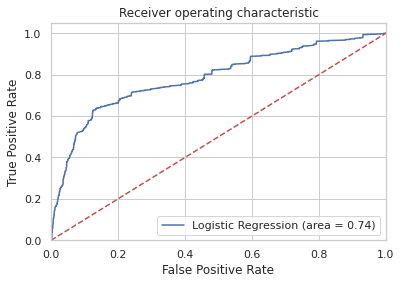

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()